In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock  # Import für Manhattan-Distanz
from pyts.metrics import dtw
from fastdtw import fastdtw

In [43]:
file_reale_fahrt = "data/001_Proband 1 - reale Fahrt.csv"
file_simuliert = "data/002_Proband 1 - simulierte Fahrt.csv"

columns_needed = ['Row', 'Timestamp', 'Tonic Signal', 'Phasic Signal', 'Heart Rate ECG LL-RA ALG', 'IBI ECG LL-RA ALG','Überland 1 (Hochschule - Haidt) active on Glasses sync','Stadt 1 (Haidt) active on Glasses sync','Überland 2 (Haidt - Autobahn) active on Glasses sync','Überland 3 (Regnitzlosau - Hof) active on Glasses sync','Stadt 2 (Jägersruh) active on Glasses sync','Stadt 3 (Hof) active on Glasses sync','Autobahn active on Glasses sync','Baseline active on Glasses sync']

df_simuliert = pd.read_csv(file_simuliert, skiprows=27, usecols=columns_needed)
df_reale_fahrt = pd.read_csv(file_reale_fahrt, skiprows=27, usecols=columns_needed)

In [44]:
df_simuliert.head(1000)

,Row,Timestamp,Tonic Signal,Phasic Signal,Heart Rate ECG LL-RA ALG,IBI ECG LL-RA ALG,Überland 1 (Hochschule - Haidt) active on Glasses sync,Stadt 1 (Haidt) active on Glasses sync,Überland 2 (Haidt - Autobahn) active on Glasses sync,Überland 3 (Regnitzlosau - Hof) active on Glasses sync,Stadt 2 (Jägersruh) active on Glasses sync,Stadt 3 (Hof) active on Glasses sync,Autobahn active on Glasses sync,Baseline active on Glasses sync
0,1,152.718800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,153.930250,NaN,NaN,91.157270,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,155.883375,NaN,NaN,91.157270,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,157.836500,NaN,NaN,91.157270,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,159.789625,NaN,NaN,91.157270,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1704.711500,NaN,NaN,88.786127,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,997,1706.664625,NaN,NaN,88.786127,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,998,1706.706200,8.410869,0.029013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,999,1708.617750,NaN,NaN,88.786127,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#überland 1
#8243,13114.5898,,,,,,,,,1,7.31324424704216,0.0697013207191676,,,,1,,,,,,,
#8248

filter_col = 'Stadt 1 (Haidt) active on Glasses sync'

df_simuliert_filtered = df_simuliert[df_simuliert[filter_col] == 1]
df_reale_fahrt_filtered = df_reale_fahrt[df_reale_fahrt[filter_col] == 1]

# NaN-Werte entfernen
df_simuliert_filtered = df_simuliert_filtered.dropna(subset=['Tonic Signal'])
df_reale_fahrt_filtered = df_reale_fahrt_filtered.dropna(subset=['Tonic Signal'])

tonic_signal_simuliert = df_simuliert_filtered[['Timestamp', 'Tonic Signal']]
tonic_signal_reale_fahrt = df_reale_fahrt_filtered[['Timestamp', 'Tonic Signal']]

In [53]:
tonic_signal_reale_fahrt.head(100)

,Timestamp,Tonic Signal
142804,223278.6523,6.496407
142809,223286.4648,6.496407
142814,223294.2773,6.496407
142819,223302.0898,6.496407
142824,223309.9023,6.496407
...,...,...
143279,224020.8398,6.527039
143284,224028.6523,6.527039
143289,224036.4648,6.527039
143294,224044.2773,6.527039


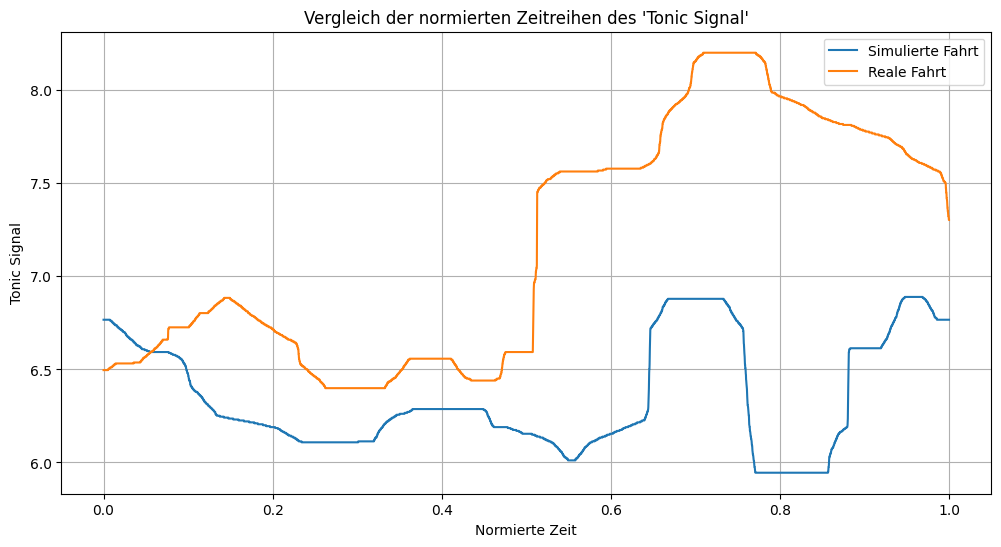

In [54]:
# Normieren der Zeitspalten (auf [0, 1] skalieren)
df_simuliert_filtered['Normalized Time'] = (df_simuliert_filtered['Timestamp'] - df_simuliert_filtered['Timestamp'].min()) / (df_simuliert_filtered['Timestamp'].max() - df_simuliert_filtered['Timestamp'].min())
df_reale_fahrt_filtered['Normalized Time'] = (df_reale_fahrt_filtered['Timestamp'] - df_reale_fahrt_filtered['Timestamp'].min()) / (df_reale_fahrt_filtered['Timestamp'].max() - df_reale_fahrt_filtered['Timestamp'].min())

# Erstellen des Diagramms
plt.figure(figsize=(12, 6))
plt.plot(df_simuliert_filtered['Normalized Time'], df_simuliert_filtered['Tonic Signal'], label='Simulierte Fahrt')
plt.plot(df_reale_fahrt_filtered['Normalized Time'], df_reale_fahrt_filtered['Tonic Signal'], label='Reale Fahrt')

# Diagramm formatieren
plt.title("Vergleich der normierten Zeitreihen des 'Tonic Signal'")
plt.xlabel("Normierte Zeit")
plt.ylabel("Tonic Signal")
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

In [73]:
# Wir stellen sicher, dass beide Zeitreihen die gleiche Länge haben, indem wir sie auf die kürzere Länge trimmen
min_len = min(len(df_simuliert_filtered), len(df_reale_fahrt_filtered))
tonic_simuliert = df_simuliert_filtered['Tonic Signal'].values[:min_len]
tonic_reale_fahrt = df_reale_fahrt_filtered['Tonic Signal'].values[:min_len]

Der **Pearson-Korrelationskoeffizient** misst die lineare Korrelation zwischen zwei Variablen \( X \) und \( Y \) und gibt an, wie stark die beiden Zeitreihen linear miteinander verbunden sind. Der Wert liegt zwischen -1 und 1, wobei:

- $1$ eine perfekte positive lineare Korrelation bedeutet,
- $-1$ eine perfekte negative lineare Korrelation bedeutet,
- $0$ keine lineare Korrelation bedeutet.

Die Formel für den Pearson-Korrelationskoeffizienten $r$ lautet:

$$
r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \cdot \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

wobei:

- $X_i$ und $Y_i$ die Werte der jeweiligen Zeitreihen an Position $i$ sind,
- $\bar{X}$ und $\bar{Y}$ die Mittelwerte der Zeitreihen $X$ und $Y$ sind,
- $n$ die Anzahl der Datenpunkte ist.

In [74]:
# Berechne den Pearson-Korrelationskoeffizienten
correlation, _ = pearsonr(tonic_simuliert, tonic_reale_fahrt)
print(f"Pearson-Korrelationskoeffizient: {correlation}")

Pearson-Korrelationskoeffizient: 0.31082026466431945


**Dynamic Time Warping (DTW)** ist ein Algorithmus zur Berechnung der Ähnlichkeit zwischen zwei Zeitreihen, die sich in der Länge unterscheiden oder zeitlich versetzt sind. DTW sucht nach dem optimalen Pfad, der die beiden Zeitreihen so aufeinander abbildet, dass die Gesamtdistanz minimal ist.

Der DTW-Abstand zwischen zwei Zeitreihen $X = (x_1, x_2, \dots, x_n)$ und $Y = (y_1, y_2, \dots, y_m)$ wird wie folgt berechnet:

1. **Distanzmatrix**: Berechne eine Matrix $D$ der euklidischen Distanzen zwischen allen Paaren von Punkten $(x_i, y_j)$, also $D(i, j) = \| x_i - y_j \|$.
   
2. **Kumulative Distanzmatrix**: Berechne eine Matrix $C$, in der der Wert $C(i, j)$ die minimale kumulative Distanz repräsentiert, um von $(0, 0)$ nach $(i, j)$ zu gelangen. Die Werte werden rekursiv berechnet als:
   
   $$
   C(i, j) = D(i, j) + \min \{ C(i-1, j), C(i, j-1), C(i-1, j-1) \}
   $$
   
   wobei $C(0, 0) = D(0, 0)$ ist.

3. **DTW-Distanz**: Der minimale kumulative Pfad durch die Matrix $C$ ergibt die DTW-Distanz zwischen den beiden Zeitreihen, d.h., $C(n, m)$ gibt die minimale Distanz an.

DTW eignet sich besonders für den Vergleich von Zeitreihen mit Verschiebungen und Skalierungen in der Zeitdimension, da es elastisch ist und zeitliche Verzerrungen berücksichtigt.

In [84]:
# Berechne DTW
#tonic_simuliert_2d = np.column_stack((np.arange(len(tonic_simuliert)), tonic_simuliert))
#tonic_reale_fahrt_2d = np.column_stack((np.arange(len(tonic_reale_fahrt)), tonic_reale_fahrt))
#distance, _ = fastdtw(tonic_simuliert_2d, tonic_reale_fahrt_2d, dist=cityblock)
#print(f"Dynamic Time Warping (DTW)-Distanz: {distance}")

distance = dtw(tonic_simuliert, tonic_reale_fahrt)
#distance = dtw(df_simuliert_filtered['Tonic Signal'].values, df_reale_fahrt_filtered['Tonic Signal'].values)
print(f"DTW Distance: {distance}")

DTW Distance: 51.75970886617162
